# Airbnb Price Analysis in NYC 


## 1) Introduction


Airbnb is one of numerous gig economy platforms that has disrupted the hotel industry. It allows individuals to rent out a room or entire apartment / house. Having world class museums such as MOMA, The Met, and the Museum of Natrual History while also offering dozens of Broadway shows, NYC is the most popular tourist city in the United States. 

This data set contains listings data on numerous metrics such as borough, neighborhood, room type, price, number of  reviews, and more. I will be examining if price's relationship to room type in each borough. I also will be anaylzing <br>

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 2) Reading and Cleaning Data

In [1]:
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

<br>
First reading the data and taking an overview of the dataset.
<br><br>

In [77]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

<br>
Looking at the first and last 5 entries just to become familiar with the data.
<br><br>

In [63]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<br>
Now the data looks pretty standard, but going to check to make sure there is no "drunk data" for neighborhood_group, neighborhood, and room_type. 
<br><br>
(Ex: "Entire Home/Apt" is the only way to describe the listing for a total home/apartment rental. Not, "Entire Apartment/Home" as that would mess with the data)
<br><br>

In [27]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [34]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [35]:
df.neighbourhood.unique();

<br>
Note, I have the output hidden above as it takes up a lot of space that is not needed, but there are no drunk values. <br> <br>
Now checking for null values.
<br><br>

In [78]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<br>
Going to fill the reviews_per_month column in with '0'. Will also fill in "host_name" and "name" with "Not Available" and going to delete column "Last_review" as it will not be used.
<br><br>

In [82]:
df['reviews_per_month'].fillna(0, inplace = True)
df['name'].fillna("Not Available", inplace= True)
df['host_name'].fillna("Not Available", inplace= True)
del df['last_review']

In [83]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Now that the data is cleaned up, can begin.

## 3) Analysis

<br>
My first graph below is going to look at the relationship between price, the three different room types, and the borough of NYC. From my knowledge, I predict that Manhattan will have the overall highest prices and that entire apartments will be most expensive.
<br><br>

Text(0.5, 1.0, 'Price vs Room Type in each Borough')

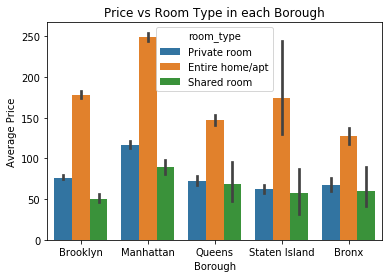

In [92]:
sns.barplot(x = 'neighbourhood_group', y = 'price', hue = 'room_type', data = df)
plt.ylabel('Average Price')
plt.xlabel('Borough')
plt.title('Price vs Room Type in each Borough')

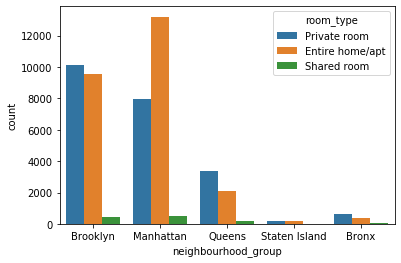

In [96]:
sns.countplot(x = 'neighbourhood_group',hue = 'room_type', data = df)

<br>
Now intersetingly, there like I predicted the prices on average are highest in Manhattan, but what
I did not expect is that Manhattan would have the most total listings and the rates still be over $250 per night on average with over 20,000 available Airbnb locations on top of NYC Hotels. <br><br> 
Now diving into Manhattan, I want to see which neighborhoods within Manhattan are the most expensive. 
<br><br>

In [117]:
manhattan =df.loc[(df['neighbourhood_group']=="Manhattan")]
manhattan.groupby(['neighbourhood']).median().sort_values(by ='price', ascending=False).head(5)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Tribeca,21798471.0,28518140.0,40.717850,-74.006940,295.0,3.0,2.0,0.110,1.0,66.0
NoHo,21319712.5,29797107.5,40.726820,-73.993010,250.0,2.0,3.5,0.385,1.0,44.5
Flatiron District,14364959.5,24673898.0,40.740990,-73.988075,225.0,3.0,4.0,0.245,1.0,19.0
Midtown,22376920.0,53179388.0,40.754130,-73.974220,210.0,3.0,2.0,0.130,1.0,151.0
West Village,15763039.0,15475205.5,40.734195,-74.003930,200.0,3.0,5.0,0.290,1.0,6.0


<br>Now we can see the most expensive neighborhood to stay is in Tribeca with an average nightly price of 295 dollars. When you look at the median (above) it is a very different picture than if you look at the average (below). There you see the average price goes up by almost $200 indicating that there are definitly some outliers. Moreover you can see that the minimum nights doubles when you look at the mean. 
<br><br>

In [116]:
manhattan.groupby(['neighbourhood']).mean().sort_values(by ='price', ascending=False).head(5)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Tribeca,1.969456e+07,5.274450e+07,40.717744,-74.007400,490.638418,11.378531,11.491525,0.518870,42.971751,126.508475
Battery Park City,1.831094e+07,6.765555e+07,40.709964,-74.016585,367.557143,30.328571,8.285714,0.347429,9.442857,100.328571
Flatiron District,1.730495e+07,5.999391e+07,40.741052,-73.988413,341.925000,6.225000,17.737500,0.907125,7.387500,123.050000
NoHo,1.908055e+07,6.658809e+07,40.727010,-73.993052,295.717949,5.987179,12.743590,0.637436,8.628205,101.820513
SoHo,1.854281e+07,6.032155e+07,40.724380,-74.002024,287.103352,5.941341,20.209497,0.920810,3.326816,110.357542


In [263]:
tribeca =df.loc[(df['neighbourhood']=="Tribeca")]
tribeca.sort_values(by ='price', ascending=False).head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.00,1,365
15390,12339863,Loft,10035055,Claudine,Manhattan,Tribeca,40.72138,-74.00767,Entire home/apt,2500,4,0,0.00,1,89
6620,4777903,SOHO GALLERY,1581845,Indi,Manhattan,Tribeca,40.71883,-74.00357,Entire home/apt,2400,1,2,0.05,1,365
38122,30091241,Tribeca - Large 4 bedroom 2 bathroom for Xmas/NY,102655617,Mahesh,Manhattan,Tribeca,40.71546,-74.00856,Entire home/apt,2000,1,1,0.16,1,0


<br>
Here are the top 5 most expensive listings in Tribeca. We see that the price on the most expensive is 8500, which definitely is the reason the Tribeca is so skewed when you look at the mean.
<br><br>

(1, 2000)

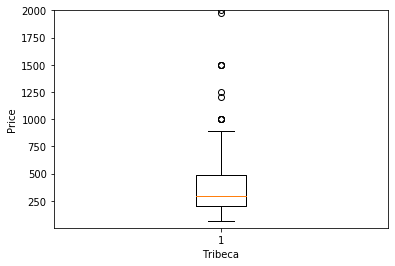

In [254]:
tribeca=df.loc[(df['neighbourhood'] == "Tribeca")]
plt.boxplot([tribeca['price']])
plt.ylabel('Price')
plt.xlabel('Tribeca')
plt.ylim([1,2000])

(1, 2000)

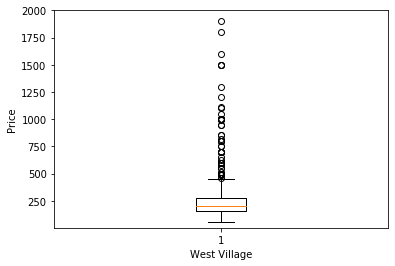

In [255]:
westvillage=df.loc[(df['neighbourhood'] == "West Village")]
plt.boxplot([westvillage['price']])
plt.ylabel('Price')
plt.xlabel('West Village')
plt.ylim([1,2000])

Here, boxplots are used so we can take a visual look at what the rents would be. I limited the y-axis of the graph to be 2000, but to note, there are a few more outliers that are not drawn on this graph. Now looking at the graph for Tribeca, there is over 75% of properties that are under 500 dollars a night, but when we looked at the mean, it showed there the average was almost 500 dollars. The outliers in this dataset really skew the data! Similarly for West Village, it is ranked number five most expensive by median, but on the chart of ranking the means, it does not appear. This is probably because over 75 percent of the listings are around 250 dollars with outliers reaching to 2000 dollars rather than Tribeca's which reaches 8500 dollars. 